In [1]:
!pip install pandas

In [ ]:
!pip install datasets

In [2]:
import pandas as pd
from datasets import load_dataset

In [3]:
!pip install pandas datasets nltk tokenizers scikit-learn matplotlib

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/roberta-
[nltk_data]     abreu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
import unicodedata

In [6]:
import string
from tokenizers import ByteLevelBPETokenizer
nltk.download('stopwords')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /home/roberta-
[nltk_data]     abreu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import matplotlib.pyplot as plt

Carregando e lendo o datasets:

In [8]:
dataset = load_dataset("ruanchaves/b2w-reviews01", split='train')
df = pd.DataFrame(dataset)
df.to_csv('./datasets/dataset.csv', index=False)


In [9]:
df.head()

submission_date                                        reviewer_id  \
0  2018-01-01 00:11:28  d0fb1ca69422530334178f5c8624aa7a99da47907c44de...   
1  2018-01-01 00:13:48  014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...   
2  2018-01-01 00:26:02  44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...   
3  2018-01-01 00:35:54  ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...   
4  2018-01-01 01:00:28  7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...   

  product_id                                       product_name  \
0  132532965  Notebook Asus Vivobook Max X541NA-GO472T Intel...   
1   22562178               Copo Acrílico Com Canudo 500ml Rocie   
2  113022329  Panela de Pressão Elétrica Philips Walita Dail...   
3  113851581               Betoneira Columbus - Roma Brinquedos   
4  131788803  Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com C...   

    product_brand      site_category_lv1       site_category_lv2  \
0            None            Informática                Notebook   
1            None  Utilidades Domésticas  Copos, Taças e Canecas   
2  philips walita        Eletroportáteis         Panela Elétrica   
3     roma jensen             Brinquedos   Veículos de Brinquedo   
4              lg      TV e Home Theater                      TV   

                       review_title  overall_rating recommend_to_a_friend  \
0                               Bom               4                   Yes   
1  Preço imbatível, ótima qualidade               4                   Yes   
2      ATENDE TODAS AS EXPECTATIVA.               4                   Yes   
3        presente mais que desejado               4                   Yes   
4            Sem duvidas, excelente               5                   Yes   

                                         review_text  reviewer_birth_year  \
0  Estou contente com a compra entrega rápida o ú...               1958.0   
1  Por apenas R$1994.20,eu consegui comprar esse ...               1996.0   
2  SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...               1984.0   
3  MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...               1985.0   
4  A entrega foi no prazo, as americanas estão de...               1994.0   

  reviewer_gender reviewer_state  
0               F             RJ  
1               M             SC  
2               M             SP  
3               F             SP  
4               M             MG

Extraindo apenas as colunas que serão utilizadas: 'product_name', 'overall_rating'

In [26]:
filtered_df = df[['product_name', 'overall_rating']]

In [83]:
#valores vazios muito alto
#0 -> exclui linhas, 1 -> exclui colunas
#exclui se todos estão vazios
filtered_df = filtered_df.dropna(axis=0, how='all')
display(filtered_df)

product_name  overall_rating
0       Notebook Asus Vivobook Max X541NA-GO472T Intel...               4
1                    Copo Acrílico Com Canudo 500ml Rocie               4
2       Panela de Pressão Elétrica Philips Walita Dail...               4
3                    Betoneira Columbus - Roma Brinquedos               4
4       Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com C...               5
...                                                   ...             ...
132368     Carregador De Pilha Sony + 4 Pilhas Aa 2500mah               5
132369          Mop Giratório Fit + Refil Extra - At Home               5
132370  Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...               4
132371       Etiquetas Jurídicas Vade Mecum - Marca Fácil               1
132372  Painel de Fotos Bee Colection Rue Bac (74x94x3...               1

[132373 rows x 2 columns]

In [85]:

filtered_df['product_name'] = filtered_df['product_name'].fillna("valor faltando")
filtered_df['overall_rating'] = filtered_df['overall_rating'].fillna("")

In [86]:
filtered_df.head()

product_name  overall_rating
0  Notebook Asus Vivobook Max X541NA-GO472T Intel...               4
1               Copo Acrílico Com Canudo 500ml Rocie               4
2  Panela de Pressão Elétrica Philips Walita Dail...               4
3               Betoneira Columbus - Roma Brinquedos               4
4  Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com C...               5

In [87]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   product_name    132373 non-null  object
 1   overall_rating  132373 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB
None


In [88]:
print(filtered_df.isna().sum())

product_name      0
overall_rating    0
dtype: int64


In [89]:
display(filtered_df)

product_name  overall_rating
0       Notebook Asus Vivobook Max X541NA-GO472T Intel...               4
1                    Copo Acrílico Com Canudo 500ml Rocie               4
2       Panela de Pressão Elétrica Philips Walita Dail...               4
3                    Betoneira Columbus - Roma Brinquedos               4
4       Smart TV LED 43" LG 43UJ6525 Ultra HD 4K com C...               5
...                                                   ...             ...
132368     Carregador De Pilha Sony + 4 Pilhas Aa 2500mah               5
132369          Mop Giratório Fit + Refil Extra - At Home               5
132370  Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...               4
132371       Etiquetas Jurídicas Vade Mecum - Marca Fácil               1
132372  Painel de Fotos Bee Colection Rue Bac (74x94x3...               1

[132373 rows x 2 columns]

In [90]:
display(filtered_df.groupby('product_name').count())

overall_rating
product_name                                                      
"Celular Lg B-220 Dual Sim 1.45 Radio Fm Super ...               4
"Celular Lg G360 Dual Sim Tela 3.0 Câmera, Rádi...               1
"Jogo Lixamento E Polimento 7 Rosca M14 Para Es...               1
"smartphone Alcatel Pixi4 5"" 2017 Tv 2c                         1
# Meu Amigo Secreto: Feminismo Além das Redes -...               1
...                                                            ...
Ômega 3 Óleo de Peixe 1000mg com 120 cápsulas -...               1
Ônibus De Turismo Com Luz Som Fricção 1/32 Cali...               1
Ônibus Iveco 45cm 270 - Usual Brinquedos                         1
óculos realidade virtual com controle                            1
�Leo Elixir De Beleza Unissex 50ml Orofluido                     1

[47364 rows x 1 columns]

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
produtos_melhores_notas = filtered_df['overall_rating'].value_counts(normalize=True)
produtos_melhores_notas

overall_rating
5    0.362272
4    0.244347
1    0.206757
3    0.123250
2    0.063374
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Satisfaction by rate')

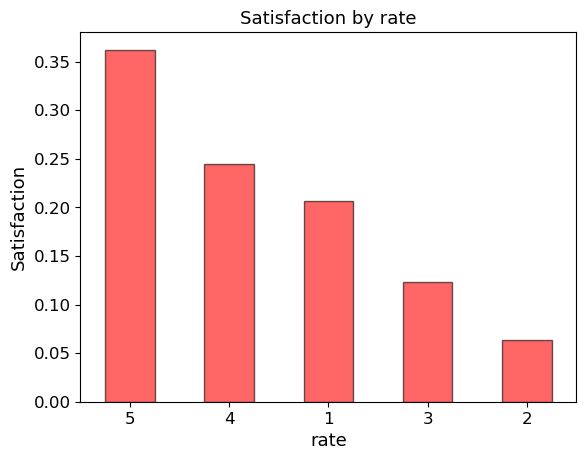

In [93]:
produtos_melhores_notas.plot.bar(color='red', ec =  'k', alpha=0.6)
plt.xticks(rotation =360, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("rate", fontsize=13)
plt.ylabel('Satisfaction', fontsize=13)
plt.title('Satisfaction by rate', fontsize=13)

Preprocessamento:

In [94]:
pd.crosstab(index=filtered_df['product_name'],
            columns=filtered_df['overall_rating'])

overall_rating                                      1  2  3  4  5
product_name                                                     
"Celular Lg B-220 Dual Sim 1.45 Radio Fm Super ...  2  1  0  1  0
"Celular Lg G360 Dual Sim Tela 3.0 Câmera, Rádi...  0  0  1  0  0
"Jogo Lixamento E Polimento 7 Rosca M14 Para Es...  0  0  0  1  0
"smartphone Alcatel Pixi4 5"" 2017 Tv 2c            0  0  1  0  0
# Meu Amigo Secreto: Feminismo Além das Redes -...  0  1  0  0  0
...                                                .. .. .. .. ..
Ômega 3 Óleo de Peixe 1000mg com 120 cápsulas -...  1  0  0  0  0
Ônibus De Turismo Com Luz Som Fricção 1/32 Cali...  0  0  0  1  0
Ônibus Iveco 45cm 270 - Usual Brinquedos            0  0  1  0  0
óculos realidade virtual com controle               0  0  1  0  0
�Leo Elixir De Beleza Unissex 50ml Orofluido        0  0  0  1  0

[47364 rows x 5 columns]

In [95]:
pd.crosstab(index=filtered_df['product_name'],
            columns=filtered_df['overall_rating'],
            margins=True,
            margins_name='Total')

overall_rating                                          1     2      3      4  \
product_name                                                                    
"Celular Lg B-220 Dual Sim 1.45 Radio Fm Super ...      2     1      0      1   
"Celular Lg G360 Dual Sim Tela 3.0 Câmera, Rádi...      0     0      1      0   
"Jogo Lixamento E Polimento 7 Rosca M14 Para Es...      0     0      0      1   
"smartphone Alcatel Pixi4 5"" 2017 Tv 2c                0     0      1      0   
# Meu Amigo Secreto: Feminismo Além das Redes -...      0     1      0      0   
...                                                   ...   ...    ...    ...   
Ônibus De Turismo Com Luz Som Fricção 1/32 Cali...      0     0      0      1   
Ônibus Iveco 45cm 270 - Usual Brinquedos                0     0      1      0   
óculos realidade virtual com controle                   0     0      1      0   
�Leo Elixir De Beleza Unissex 50ml Orofluido            0     0      0      1   
Total                                               27369  8389  16315  32345   

overall_rating                                          5   Total  
product_name                                                       
"Celular Lg B-220 Dual Sim 1.45 Radio Fm Super ...      0       4  
"Celular Lg G360 Dual Sim Tela 3.0 Câmera, Rádi...      0       1  
"Jogo Lixamento E Polimento 7 Rosca M14 Para Es...      0       1  
"smartphone Alcatel Pixi4 5"" 2017 Tv 2c                0       1  
# Meu Amigo Secreto: Feminismo Além das Redes -...      0       1  
...                                                   ...     ...  
Ônibus De Turismo Com Luz Som Fricção 1/32 Cali...      0       1  
Ônibus Iveco 45cm 270 - Usual Brinquedos                0       1  
óculos realidade virtual com controle                   0       1  
�Leo Elixir De Beleza Unissex 50ml Orofluido            0       1  
Total                                               47955  132373  

[47365 rows x 6 columns]

alterar o product_name para letra minúscula

In [96]:

display(filtered_df['product_name'].str.casefold())

0         notebook asus vivobook max x541na-go472t intel...
1                      copo acrílico com canudo 500ml rocie
2         panela de pressão elétrica philips walita dail...
3                      betoneira columbus - roma brinquedos
4         smart tv led 43" lg 43uj6525 ultra hd 4k com c...
                                ...                        
132368       carregador de pilha sony + 4 pilhas aa 2500mah
132369            mop giratório fit + refil extra - at home
132370    fita led 5m rgb 3528 siliconada com 300 leds c...
132371         etiquetas jurídicas vade mecum - marca fácil
132372    painel de fotos bee colection rue bac (74x94x3...
Name: product_name, Length: 132373, dtype: object

In [97]:
product_name_normalized = filtered_df["product_name"].str.casefold()


In [98]:
if "smartphone" in product_name_normalized:
    print("Found!")
for word in product_name_normalized.str.split():
    if "smartphone" in word:
        print(word)

['smartphone', 'motorola', 'moto', 'g', '5s', 'dual', 'chip', 'android', '7.1.1', 'nougat', 'tela', '5.2"', 'snapdragon', '430', '32gb', '4g', 'câmera', '16mp', '-', 'platinum']
['smartphone', 'motorola', 'moto', 'g', '5s', 'dual', 'chip', 'android', '7.1.1', 'nougat', 'tela', '5.2"', 'snapdragon', '430', '32gb', '4g', 'câmera', '16mp', '-', 'dourado']
['smartphone', 'lg', 'k10', 'dual', 'chip', 'android', '6.0', 'marshmallow', 'tela', '5.3"', '16gb', '4g', 'câmera', '13mp', 'tv', 'digital', '-', 'dourado']
['smartphone', 'samsung', 'galaxy', 'a5', '2016', 'dual', 'chip', 'android', '5.1', 'tela', '5.2"', '16gb', '4g', 'câmera', '13mp', '-', 'dourado']
['smartphone', 'asus', 'zenfone', '4', 'selfie', 'dual', 'chip', 'android', '7', 'tela', '5.5"', 'snapdragon', '64gb', '4g', 'câmera', 'traseira', '16mp', 'dual', 'frontal', '20mp', '+', '8mp', '-', 'preto']
['smartphone', 'motorola', 'moto', 'x4', 'dual', 'cam', 'android', '7.0', 'tela', '5.2"', 'octa-core', '32gb', 'wi-fi', '4g', 'câme

In [116]:
pd.crosstab(
	index=product_name_normalized,
	columns=filtered_df['overall_rating']
)

overall_rating                                      1  2  3  4  5
product_name                                                     
"celular lg b-220 dual sim 1.45 radio fm super ...  2  1  0  1  0
"celular lg g360 dual sim tela 3.0 câmera, rádi...  0  0  1  0  0
"jogo lixamento e polimento 7 rosca m14 para es...  0  0  0  1  0
"smartphone alcatel pixi4 5"" 2017 tv 2c            0  0  1  0  0
# meu amigo secreto: feminismo além das redes -...  0  1  0  0  0
...                                                .. .. .. .. ..
ômega 3 óleo de peixe 1000mg com 120 cápsulas -...  1  0  0  0  0
ômega 3 óleo de peixe nts 1000mg 240 cápsulas  ...  0  0  1  0  0
ônibus de turismo com luz som fricção 1/32 cali...  0  0  0  1  0
ônibus iveco 45cm 270 - usual brinquedos            0  0  1  0  0
�leo elixir de beleza unissex 50ml orofluido        0  0  0  1  0

[47267 rows x 5 columns]

In [124]:
data_normalized = pd.crosstab(
	index=product_name_normalized,
	columns=filtered_df['overall_rating']
)
data_normalized.to_csv('data_normalized.csv>', index=False)

grau de classificação de 1 a 5

In [125]:
display(data_normalized)

overall_rating                                      1  2  3  4  5
product_name                                                     
"celular lg b-220 dual sim 1.45 radio fm super ...  2  1  0  1  0
"celular lg g360 dual sim tela 3.0 câmera, rádi...  0  0  1  0  0
"jogo lixamento e polimento 7 rosca m14 para es...  0  0  0  1  0
"smartphone alcatel pixi4 5"" 2017 tv 2c            0  0  1  0  0
# meu amigo secreto: feminismo além das redes -...  0  1  0  0  0
...                                                .. .. .. .. ..
ômega 3 óleo de peixe 1000mg com 120 cápsulas -...  1  0  0  0  0
ômega 3 óleo de peixe nts 1000mg 240 cápsulas  ...  0  0  1  0  0
ônibus de turismo com luz som fricção 1/32 cali...  0  0  0  1  0
ônibus iveco 45cm 270 - usual brinquedos            0  0  1  0  0
�leo elixir de beleza unissex 50ml orofluido        0  0  0  1  0

[47267 rows x 5 columns]

In [128]:
display(product_name_normalized[filtered_df.overall_rating == 5].sum())

'smart tv led 43" lg 43uj6525 ultra hd 4k com conversor digital 4 hdmi 2 usb webos 3.5 painel ips hdr e magic mobile connectioncopo acrílico com canudo 500ml rociecopo acrílico com canudo 500ml rocieventilador de teto ventisol fenix premium branco 3 velocidades com controle remotocopo acrílico com canudo 500ml rocieaspirador de pó philco rapid 1000n vermelho/preto - 1000wconjunto de panelas antiaderente turim 10 peças vermelha tramontinatênis casual conforto beira riosmart tv android led 49" tcl c2 49c2us ultra hd 4k com conversor digital soundbar integrado 3 hdmi e 2 usb 120hz - pretacafeteira elétrica cadence single caf111 com 2 xícaras - vermelhomop giratório fit + refil extra - at homecâmera estilo go-pro sports hd 1080p esportes radicaiscopo acrílico com canudo 500ml rociesmartphone asus zenfone 4 selfie dual chip android 7 tela 5.5" snapdragon 64gb 4g câmera traseira 16mp dual frontal 20mp + 8mp - pretosmartphone motorola moto x4 dual cam android 7.0 tela 5.2" octa-core 32gb wi-f